In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Basic Model for initializing a NN Model
class Model(nn.Module): # Must write
    
    def __init__(self, in_features=4,h1=8,h2=9,out_features=3):
        super().__init__() # Must write. It calls the constructor for nn.Module class
        self.fc1 = nn.Linear(in_features, h1) # Creates i/p layer 1 with full connections b/w in_features and h1
        self.fc2 = nn.Linear(h1, h2) # Hidden layer 2 creates full connections b/w h1 and h2
        self.out = nn.Linear(h2, out_features) # O/p later 3 with full connections b/w h2 and out_features
        
    def forward(self, x): # Forward propogation method
        x = F.relu(self.fc1(x)) # The o/p of 1st layer becomes i/p for 2nd layer
        x = F.relu(self.fc2(x)) # The o/p of 2nd layer becomes i/p for 3rd layer
        x = F.relu(self.out(x)) # The o/p of 3rd layer becomes the final output
        return x # Return the final o/p as o/p

In [3]:
df = pd.read_csv(r"C:\AnCodeRR\PYTORCH_NOTEBOOKS\Data\iris.csv") # Reading data

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [7]:
X = df.drop('target',axis=1) # X is the i/p features and this target is dropped 
y = df['target'] # y is the o/p for x features ===NOTE===> THEY ARE PANDAS DATAFRAME.

In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
type(y)

pandas.core.series.Series

In [10]:
X = X.values # ===NOTE===> X and y converted into numpy arrays
y = y.values

In [11]:
type(X)

numpy.ndarray

In [12]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [13]:
# This divide the whole dataset into training and test i/p data and o/p data automatically.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33) 
# Random state is the seed for random values.

In [14]:
X_train

array([[5.6, 2.7, 4.2, 1.3],
       [6.7, 3.1, 4.7, 1.5],
       [5.6, 2.8, 4.9, 2. ],
       [6.4, 3.2, 5.3, 2.3],
       [6.7, 3.1, 5.6, 2.4],
       [6.7, 3. , 5.2, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5. , 2.3, 3.3, 1. ],
       [4.9, 3.1, 1.5, 0.1],
       [6.3, 2.3, 4.4, 1.3],
       [5.8, 2.6, 4. , 1.2],
       [6.2, 2.9, 4.3, 1.3],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.1, 2.5, 3. , 1.1],
       [4.8, 3.4, 1.6, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [5.1, 3.4, 1.5, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.5, 3. , 5.5, 1.8],
       [5.4, 3.9, 1.7, 0.4],
       [7. , 3.2, 4.7, 1.4],
       [5.8, 2.8, 5.1, 2.4],
       [7.7, 2.6, 6.9, 2.3],
       [5.5, 2.5, 4. , 1.3],
       [5.9, 3.2, 4.8, 1.8],
       [4.9, 3.1, 1.5, 0.1],
       [4.5, 2.3, 1.3, 0.3],
       [6.3, 2.8, 5.1, 1.5],
       [4.4, 2.9, 1.4, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [7.2, 3. , 5.8, 1.6],
       [6. , 3

In [15]:
type(X_train)

numpy.ndarray

In [16]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [17]:
type(X_train)

torch.Tensor

In [18]:
X_train

tensor([[5.6000, 2.7000, 4.2000, 1.3000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [5.6000, 2.8000, 4.9000, 2.0000],
        [6.4000, 3.2000, 5.3000, 2.3000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [5.8000, 2.6000, 4.0000, 1.2000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [7.9000, 3.8000, 6.4000, 2.0000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [5.6000, 2.9000, 3.6000, 1.3000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [7.0000, 3.2000, 4.7000, 1

In [19]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [20]:
torch.manual_seed(4)
model = Model()

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [22]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [23]:
epochs = 100
losses = []

for i in range(epochs):
    i += 1
    y_pred = model.forward(X_train)
    
    loss = criterion(y_pred, y_train)
    
    losses.append(loss)
    
    if i%10 == 1:
        print(f'Epoch: {i} & Loss: {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 1 & Loss: 1.0956822633743286
Epoch: 11 & Loss: 0.9819066524505615
Epoch: 21 & Loss: 0.79116290807724
Epoch: 31 & Loss: 0.5399959683418274
Epoch: 41 & Loss: 0.35664159059524536
Epoch: 51 & Loss: 0.22170095145702362
Epoch: 61 & Loss: 0.1289195567369461
Epoch: 71 & Loss: 0.08875247836112976
Epoch: 81 & Loss: 0.07240226864814758
Epoch: 91 & Loss: 0.0646730437874794


Text(0.5, 0, 'Epoch')

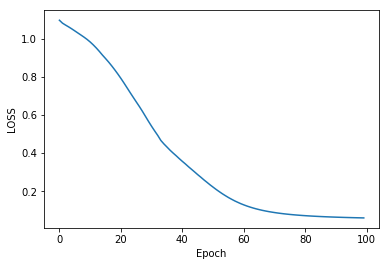

In [24]:
plt.plot(range(epochs),[loss.item() for loss in losses])
plt.ylabel('LOSS')
plt.xlabel('Epoch')

In [25]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
    

In [26]:
loss

tensor(0.0609)

In [27]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1}=>  {str(y_val)}  ans:{y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'we got {correct} correct!')

1=>  tensor([ 3.9362, 11.8163,  6.0314])  ans:1
2=>  tensor([ 5.1330, 13.2102,  5.5338])  ans:1
3=>  tensor([15.8133,  9.9178,  0.0000])  ans:0
4=>  tensor([ 2.7497, 12.7803,  9.0323])  ans:1
5=>  tensor([ 0.0000, 12.4402, 15.7179])  ans:2
6=>  tensor([ 0.0000, 12.8932, 22.6558])  ans:2
7=>  tensor([16.2079, 10.2480,  0.0000])  ans:0
8=>  tensor([16.8392, 10.4613,  0.0000])  ans:0
9=>  tensor([ 0.0000, 12.9876, 15.3816])  ans:2
10=>  tensor([ 0.0000, 13.5613, 18.9499])  ans:2
11=>  tensor([ 0.0000, 13.4885, 20.2893])  ans:2
12=>  tensor([15.0628,  9.3503,  0.0000])  ans:0
13=>  tensor([ 0.0000, 12.8901, 19.1390])  ans:2
14=>  tensor([ 2.4699, 12.4087,  9.0952])  ans:1
15=>  tensor([ 0.0000, 13.3406, 15.8232])  ans:2
16=>  tensor([ 4.8068, 12.7118,  5.5457])  ans:1
17=>  tensor([ 0.4437, 12.2442, 12.2785])  ans:2
18=>  tensor([17.1069, 10.6343,  0.0000])  ans:0
19=>  tensor([ 3.1121, 12.8572,  8.5020])  ans:1
20=>  tensor([ 0.0000, 14.1767, 16.6831])  ans:2
21=>  tensor([16.1579, 10.086

In [28]:
torch.save(model.state_dict(),r'C:\AnCodeRR\iris_model.pt')

In [29]:
new_model = Model()
new_model.load_state_dict(torch.load(r'C:\AnCodeRR\iris_model.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [30]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [31]:
ind_data = torch.tensor([5.6,3.7,2.2,0.5])

In [32]:
with torch.no_grad():
    ans = new_model(ind_data)
    print(ans.argmax())

tensor(0)
